# 第5次计算物理作业
## 题目

$$
\partial_t^2 y= \partial_x^2 y
$$

此为一维双曲型偏微分方程，求通解需要两个初始条件：

$$
\begin{cases}
y(x,0)=\sin\pi x\\
\partial_t y(x,0)=0
\end{cases}
$$

此外有两个束缚条件,但是循环写得好就不用管。

$$
\begin{cases}
y(0,t)=0\\
y(1,t)=0
\end{cases}
$$

## 参数设置
* 迭代公式

迭代差分公式为：
$$
y(x_i,t_{k+1})=2(1-(\frac{\tau}{h})^2)y(x_i,t_k)+(\frac{\tau}{h})^2[y(x_{i+1},t_k)+y(x_{i-1},t_k)]-y(x_i,t_{k-1})
$$

其中 $\tau$ 为时间步长，$h$ 为空间步长。其收敛条件为：
* 步长设置
$$
\frac{\tau}{h}\le 1
$$

题目令 $\tau=h$ 多半是为了简化迭代公式，但其实从计算量来说，简化不了多少，所以就不卡着极限了。设置步长为：
$$
\begin{cases}
\tau=0.01\\
h=0.02
\end{cases}
$$

* 区间
$$
t_{range}\in[0,10]\\
x_{range}\in[0,1]
$$


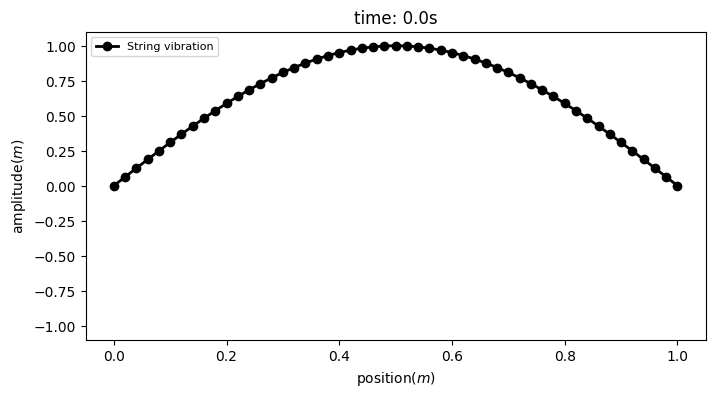

In [19]:
# library
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# varables definition
## parameter setting
h=0.02
tau=0.01
x_range=[0,1]
t_range=[0,10]
## array presetting
x_array=np.arange(x_range[0],x_range[1]+h,h)
t_array=np.arange(t_range[0],t_range[1]+tau,tau)
x_row=np.size(x_array)
t_row=np.size(t_array)
y_matrix=np.zeros((x_row,t_row))

# calculate
## primal conditons: t=0 and t=tau
### first kind condition
y_matrix[:,0]=np.sin(np.pi*x_array)
### second kind condition
y_matrix[:,1]=y_matrix[:,0]
## 代入迭代公式
### 边界条件已经自动符合。
for k in range(1,t_row-1):
    for i in range(1,x_row-1):
        y_matrix[i,k+1]=2*(1-(tau/h)**2)*y_matrix[i,k]\
        +(tau/h)**2*(y_matrix[i+1,k]+y_matrix[i-1,k])-y_matrix[i,k-1]

# Graph
## variables
x_array = x_array
y_array = y_matrix[:,0]
## figure
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
### plot
line,=ax.plot(x_array,y_array,marker='o',color='k',linewidth=2.0,label='String vibration')
### title
ax.set_title("String vibration evolution",fontsize=22,x=0.5,y=1)
### legend
legend=ax.legend(loc='upper left',prop = {'size':8})
### label
ax.set_xlabel(r"position($m$)")
ax.set_ylabel(r"amplitude($m$)")
### limit
ax.set_ylim([-1.1,1.1])
## 动画
def update(n):  # 动态更新函数 
    line.set_ydata(y_matrix[:,n])
    ## title
    ax.set_title("time: {}s".format(t_array[n]))
ani = FuncAnimation(fig, update,fargs=(), frames=t_row, interval=1, blit=False, repeat=True)
## 保存为GIF
#ani.save('animation.gif', writer='pillow', fps=20)